# Project 2020

These are my solutions to the Project for the module Machine Learning and Statistics at GMIT. The author is Alexandra Macuga (G00376287@gmit.ie).

This is a Jupyter notebook that trains a model using the dataset. In the notebook I will explain my model and give an analysis of its accuracy.

## Dataset

Import the required modules and have a look at the dataset.

In [1]:
# Numerical arrays.
import numpy as np

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Machine Learning- split dataset
from sklearn.model_selection import train_test_split

# Plotting.
import matplotlib.pyplot as plt

# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Neural networks.
import tensorflow.keras as kr

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
# Data set.
df = pd.read_csv("powerproduction.csv")
# Numpy array
data = df.values

In [4]:
# Preview the first 10 lines of the loaded data 
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [5]:
# Statistics
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


We have two columns in the dataset- *speed* and *power*. There is 500 values in both columns. The column *speed* has values between 0 to 25, and the column *power* has values between 0 to 113.556. 

## Plot the dataset

<AxesSubplot:xlabel='speed', ylabel='power'>

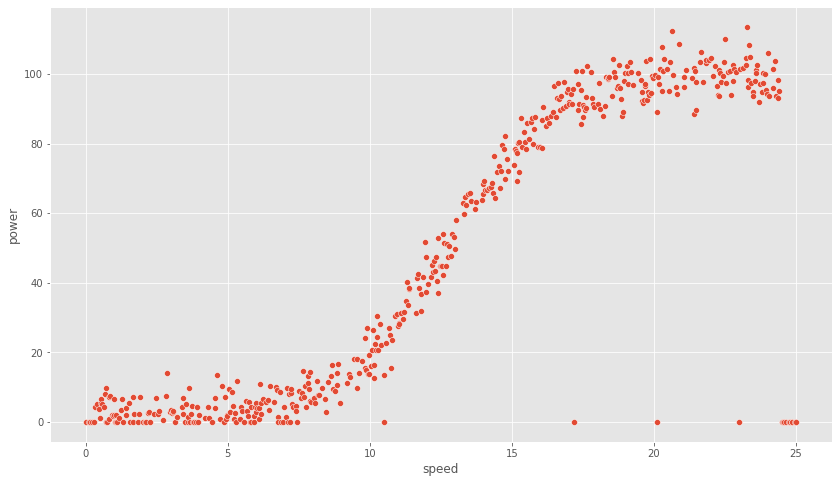

In [6]:
# plot using seaborn scatterplot
sns.scatterplot(x = "speed", y = "power", data = df)

Based on the plot, it looks like there is a linear relatioship between speed and power. The higher the wind, the higher the power. However, in some observations where the speed is over 10, the power is 0. This can have a lot of reasons like recording errors, failures, maintenance etc. As outliers can skew statistical measures and data distributions, we should remove them from dataset.

In [7]:
# Count how many observations have power = 0 and speed > 10 (outliers)
df[(df.power == 0) & (df.speed >= 10)].count()

speed    14
power    14
dtype: int64

In [8]:
# Remove outliers from dataset
df = df.drop(df.loc[(df.power == 0) & (df.speed >= 10)].index)
df.count()

speed    486
power    486
dtype: int64

In [9]:
df.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000


I decided to remove 14 observations from the dataset. The observations are outliers, where the speed was higher than 10 and the power was 0. There is 486 observations in the dataset now. The column speed has values between 0 to 24.399, and the column power has values between 0 to 113.556.

In [10]:
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(486, 1) (486,)
(388, 1) (98, 1) (388,) (98,)


Split the dataset into train set and test set. There is 388 observations in the train dataset and 98 observations in the test dataset. 

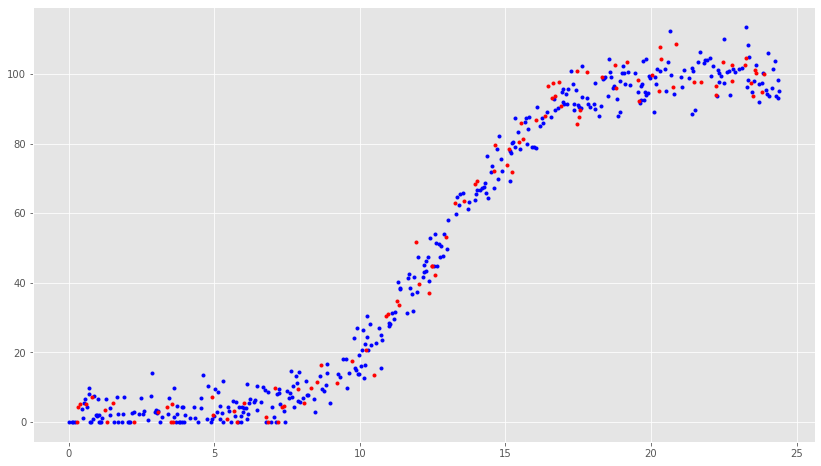

In [11]:
# Plot the train and test dataset
# train set- blue color
plt.plot(X_train, y_train, '.b')
#test set-red color
plt.plot(X_test, y_test, '.r')

## Statsmodels

**Statsmodels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.[1]

In [12]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(data)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.812e+33
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:18:55   Log-Likelihood:                 14777.
No. Observations:                 486   AIC:                        -2.955e+04
Df Residuals:                     483   BIC:                        -2.954e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.809e-14    1.7e-15    -16.478      0.0

## Regression in keras

### Linear regression


To find the relationship between speed and power, we can use regression. *Linear regression* uses the relationship between the data-points to draw a straight line through all them. This line can be used to predict future values.[2]

In [13]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [14]:
# Train the neural network on our training data.
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 2ms/step - loss: 2571.6892
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 2650.7938
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 2573.0014
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 2418.9095
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 2280.1550
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 2404.2261
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 2324.8825
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 2292.5960
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 2207.7655
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 2558.0305
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 2179.2762
Epoch 12/500
13/13 [==============================] - 0s 2ms/step - loss: 2283.0058
E

13/13 [==============================] - 0s 2ms/step - loss: 1179.1451
Epoch 98/500
13/13 [==============================] - 0s 1ms/step - loss: 1250.8727
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 1212.5075
Epoch 100/500
13/13 [==============================] - 0s 1ms/step - loss: 1209.5550
Epoch 101/500
13/13 [==============================] - 0s 1ms/step - loss: 1147.1332
Epoch 102/500
13/13 [==============================] - 0s 2ms/step - loss: 1126.5387
Epoch 103/500
13/13 [==============================] - 0s 2ms/step - loss: 1168.0995
Epoch 104/500
13/13 [==============================] - 0s 2ms/step - loss: 1127.7122
Epoch 105/500
13/13 [==============================] - 0s 2ms/step - loss: 1052.0005
Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 1152.9114
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 1166.7989
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 1083.3

13/13 [==============================] - 0s 2ms/step - loss: 563.6035
Epoch 195/500
13/13 [==============================] - 0s 1ms/step - loss: 599.0112
Epoch 196/500
13/13 [==============================] - 0s 1ms/step - loss: 571.1422
Epoch 197/500
13/13 [==============================] - 0s 2ms/step - loss: 577.3171
Epoch 198/500
13/13 [==============================] - 0s 2ms/step - loss: 547.8984
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 528.8896
Epoch 200/500
13/13 [==============================] - 0s 1ms/step - loss: 549.1968
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 539.9530
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 487.3012
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 536.0846
Epoch 204/500
13/13 [==============================] - 0s 2ms/step - loss: 498.0213
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 507.9658
Epoch 

13/13 [==============================] - 0s 1ms/step - loss: 343.9816
Epoch 292/500
13/13 [==============================] - 0s 2ms/step - loss: 330.3748
Epoch 293/500
13/13 [==============================] - 0s 2ms/step - loss: 329.5447
Epoch 294/500
13/13 [==============================] - 0s 2ms/step - loss: 323.0836
Epoch 295/500
13/13 [==============================] - 0s 1ms/step - loss: 310.3853
Epoch 296/500
13/13 [==============================] - 0s 1ms/step - loss: 327.9960
Epoch 297/500
13/13 [==============================] - 0s 2ms/step - loss: 325.1795
Epoch 298/500
13/13 [==============================] - 0s 2ms/step - loss: 327.1220
Epoch 299/500
13/13 [==============================] - 0s 2ms/step - loss: 330.3850
Epoch 300/500
13/13 [==============================] - 0s 2ms/step - loss: 319.3361
Epoch 301/500
13/13 [==============================] - 0s 2ms/step - loss: 335.3659
Epoch 302/500
13/13 [==============================] - 0s 2ms/step - loss: 332.2234
Epoch 

13/13 [==============================] - 0s 1ms/step - loss: 273.5946
Epoch 389/500
13/13 [==============================] - 0s 2ms/step - loss: 283.9593
Epoch 390/500
13/13 [==============================] - 0s 2ms/step - loss: 275.5642
Epoch 391/500
13/13 [==============================] - ETA: 0s - loss: 219.160 - 0s 1ms/step - loss: 252.2388
Epoch 392/500
13/13 [==============================] - 0s 2ms/step - loss: 282.3965
Epoch 393/500
13/13 [==============================] - 0s 2ms/step - loss: 268.2625
Epoch 394/500
13/13 [==============================] - 0s 2ms/step - loss: 270.9964
Epoch 395/500
13/13 [==============================] - 0s 2ms/step - loss: 275.0458
Epoch 396/500
13/13 [==============================] - 0s 2ms/step - loss: 273.6012
Epoch 397/500
13/13 [==============================] - 0s 2ms/step - loss: 271.3388
Epoch 398/500
13/13 [==============================] - 0s 2ms/step - loss: 274.9930
Epoch 399/500
13/13 [==============================] - 0s 2ms/st

13/13 [==============================] - 0s 2ms/step - loss: 270.1081
Epoch 485/500
13/13 [==============================] - 0s 2ms/step - loss: 260.5153
Epoch 486/500
13/13 [==============================] - 0s 2ms/step - loss: 253.8805
Epoch 487/500
13/13 [==============================] - 0s 1ms/step - loss: 255.4272
Epoch 488/500
13/13 [==============================] - 0s 2ms/step - loss: 251.8629
Epoch 489/500
13/13 [==============================] - 0s 2ms/step - loss: 260.5426
Epoch 490/500
13/13 [==============================] - 0s 1ms/step - loss: 239.1575
Epoch 491/500
13/13 [==============================] - 0s 2ms/step - loss: 262.8485
Epoch 492/500
13/13 [==============================] - 0s 2ms/step - loss: 272.9830
Epoch 493/500
13/13 [==============================] - 0s 2ms/step - loss: 255.8476
Epoch 494/500
13/13 [==============================] - 0s 1ms/step - loss: 271.9205
Epoch 495/500
13/13 [==============================] - 0s 2ms/step - loss: 254.8221
Epoch 

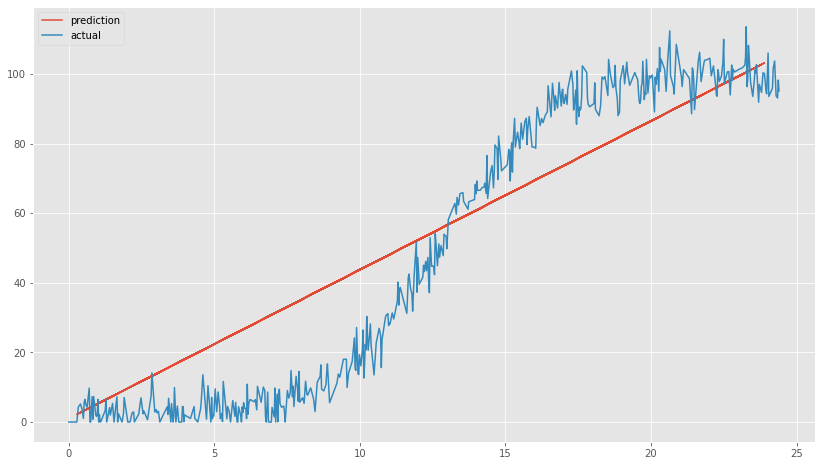

In [15]:
# Let's plot our predictions of the x values we trained on
plt.plot(X_test, model.predict(X_test), label='prediction') 
plt.plot(X, y, label = 'actual')
plt.legend()

In [16]:
model.predict([15.0])

array([[65.1201]], dtype=float32)

The model predicts that when the speed is 15, the power is 65.17.

In [17]:
# Evaluate the neural network on the test data.
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 275.0193


275.01934814453125

The plot and the evaluation are both showing that this dataset is a bad fit for linear regression.

### Polynomial

In [18]:
# Train a model with sigmoid activation function and linear activation function.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [19]:
# Train the neural network on our training data.
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 2ms/step - loss: 3944.6944
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 4023.6499
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 3628.2273
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 3869.4902
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 3902.8484
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 3795.3925
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 3559.0039
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 3500.1618
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 3412.0001
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 3154.9997
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 3359.3214
Epoch 12/500
13/13 [==============================] - 0s 2ms/step - loss: 2838.1124
E

13/13 [==============================] - 0s 1ms/step - loss: 1145.7462
Epoch 99/500
13/13 [==============================] - 0s 666us/step - loss: 1142.2560
Epoch 100/500
13/13 [==============================] - 0s 1ms/step - loss: 1031.0783
Epoch 101/500
13/13 [==============================] - 0s 1ms/step - loss: 1086.4126
Epoch 102/500
13/13 [==============================] - 0s 1ms/step - loss: 1087.3762
Epoch 103/500
13/13 [==============================] - 0s 1ms/step - loss: 1085.5469
Epoch 104/500
13/13 [==============================] - 0s 1ms/step - loss: 964.5546
Epoch 105/500
13/13 [==============================] - 0s 1ms/step - loss: 1062.8546
Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 1027.1871
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 997.1292
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 996.9787
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 924.14

13/13 [==============================] - 0s 1ms/step - loss: 331.6622
Epoch 196/500
13/13 [==============================] - 0s 1ms/step - loss: 314.4180
Epoch 197/500
13/13 [==============================] - 0s 1ms/step - loss: 323.8752
Epoch 198/500
13/13 [==============================] - 0s 1ms/step - loss: 317.9634
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 322.7019
Epoch 200/500
13/13 [==============================] - 0s 1ms/step - loss: 335.7879
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 317.1502
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 323.3638
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 296.1470
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 291.6887
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 289.6618
Epoch 206/500
13/13 [==============================] - 0s 1ms/step - loss: 291.3491
Epoch 

13/13 [==============================] - 0s 1ms/step - loss: 113.7771
Epoch 293/500
13/13 [==============================] - 0s 1ms/step - loss: 113.7033
Epoch 294/500
13/13 [==============================] - 0s 2ms/step - loss: 108.0387
Epoch 295/500
13/13 [==============================] - 0s 1ms/step - loss: 111.1653
Epoch 296/500
13/13 [==============================] - 0s 1ms/step - loss: 115.8782
Epoch 297/500
13/13 [==============================] - 0s 1ms/step - loss: 107.1908
Epoch 298/500
13/13 [==============================] - 0s 1ms/step - loss: 114.0759
Epoch 299/500
13/13 [==============================] - 0s 1ms/step - loss: 116.5823
Epoch 300/500
13/13 [==============================] - 0s 1ms/step - loss: 108.4769
Epoch 301/500
13/13 [==============================] - 0s 1ms/step - loss: 103.8363
Epoch 302/500
13/13 [==============================] - ETA: 0s - loss: 106.858 - 0s 1ms/step - loss: 105.3045
Epoch 303/500
13/13 [==============================] - 0s 1ms/st

13/13 [==============================] - 0s 1ms/step - loss: 67.6226
Epoch 390/500
13/13 [==============================] - 0s 2ms/step - loss: 72.8954
Epoch 391/500
13/13 [==============================] - 0s 3ms/step - loss: 67.6178
Epoch 392/500
13/13 [==============================] - 0s 3ms/step - loss: 65.9571
Epoch 393/500
13/13 [==============================] - 0s 2ms/step - loss: 65.3681
Epoch 394/500
13/13 [==============================] - 0s 3ms/step - loss: 64.8792
Epoch 395/500
13/13 [==============================] - 0s 2ms/step - loss: 65.3158
Epoch 396/500
13/13 [==============================] - 0s 3ms/step - loss: 60.8070
Epoch 397/500
13/13 [==============================] - 0s 2ms/step - loss: 68.8341
Epoch 398/500
13/13 [==============================] - 0s 2ms/step - loss: 67.0146
Epoch 399/500
13/13 [==============================] - 0s 2ms/step - loss: 65.3825
Epoch 400/500
13/13 [==============================] - 0s 1ms/step - loss: 65.1075
Epoch 401/500
13/1

13/13 [==============================] - 0s 2ms/step - loss: 54.0537
Epoch 488/500
13/13 [==============================] - 0s 3ms/step - loss: 49.9799
Epoch 489/500
13/13 [==============================] - 0s 3ms/step - loss: 60.6794
Epoch 490/500
13/13 [==============================] - 0s 2ms/step - loss: 50.0277
Epoch 491/500
13/13 [==============================] - 0s 1ms/step - loss: 51.3783
Epoch 492/500
13/13 [==============================] - 0s 2ms/step - loss: 57.0552
Epoch 493/500
13/13 [==============================] - 0s 1ms/step - loss: 55.6793
Epoch 494/500
13/13 [==============================] - 0s 2ms/step - loss: 50.1704
Epoch 495/500
13/13 [==============================] - 0s 1ms/step - loss: 54.0255
Epoch 496/500
13/13 [==============================] - 0s 2ms/step - loss: 51.9932
Epoch 497/500
13/13 [==============================] - 0s 2ms/step - loss: 50.0707
Epoch 498/500
13/13 [==============================] - 0s 1ms/step - loss: 53.5050
Epoch 499/500
13/1

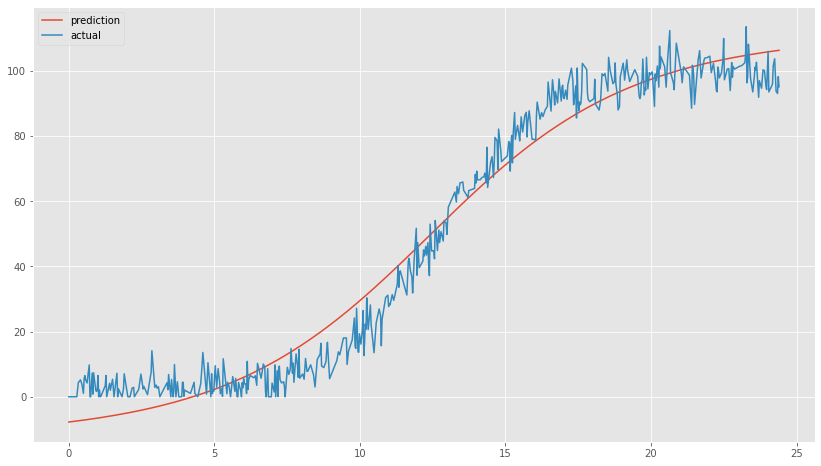

In [20]:
# Plot the predictions vs actual data.
plt.plot(X, model.predict(X), label='prediction')
plt.plot(X, y, label='actual')
plt.legend()

In [21]:
model.predict([15.0])

array([[71.16962]], dtype=float32)

The model predicts that when the speed is 15, the power is 71.33.

In [22]:
# Evaluate the neural network on the test data.
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 62.1184


62.11842346191406

### Accuracy

*The mean_squared_error* function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss. The parameter squared = false returns the RMSE value. The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. [3]

The *r2_score* function computes the coefficient of determination, usually denoted as R². It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.[4]

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation
rmse = mean_squared_error(y, model.predict(y), squared=False)
r2 = r2_score(y, model.predict(y))

print('RMSE: ', rmse)
print('R2 score: ', r2)

RMSE:  33.85582080018296
R2 score:  0.32960850413399356


This model is much better than the previous one. The loss is lower than when using only linear regression. 

## References

[1] https://www.statsmodels.org/stable/index.html

[2] https://www.w3schools.com/python/python_ml_linear_regression.asp

[3] https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models

[4] https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error